# Importamos librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy.stats import chisquare
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic

import os

# Importamos Training Data

In [2]:
full_path = "C:\Projects\EDA GSP"
train_path = os.path.join(full_path, "data", "train.csv")

In [3]:
dtypes={
    'elapsed_time':np.int32,
    'event_name':'category',
    'name':'category',
    'level':np.uint8,
    'room_coor_x':np.float32,
    'room_coor_y':np.float32,
    'screen_coor_x':np.float32,
    'screen_coor_y':np.float32,
    'hover_duration':np.float32,
    'text':'category',
    'fqid':'category',
    'room_fqid':'category',
    'text_fqid':'category',
    'fullscreen':'category',
    'hq':'category',
    'music':'category',
    'level_group':'category'}

train_df = pd.read_csv(train_path, dtype=dtypes)

# Funciones útiles

In [26]:
""" def display_rows(dataframe):
    with pd.option_context('display.max_rows', 500):
        return(dataframe) """

# Estudio de la data

In [4]:
CATEGORICAL = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']
NUMERICAL = ['elapsed_time','level','page','room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y', 'hover_duration']

In [5]:
train_df.head(5)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [6]:
print("La forma del dataset es {}".format(train_df.shape))

La forma del dataset es (26296946, 20)


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26296946 entries, 0 to 26296945
Data columns (total 20 columns):
 #   Column          Dtype   
---  ------          -----   
 0   session_id      int64   
 1   index           int64   
 2   elapsed_time    int32   
 3   event_name      category
 4   name            category
 5   level           uint8   
 6   page            float64 
 7   room_coor_x     float32 
 8   room_coor_y     float32 
 9   screen_coor_x   float32 
 10  screen_coor_y   float32 
 11  hover_duration  float32 
 12  text            category
 13  fqid            category
 14  room_fqid       category
 15  text_fqid       category
 16  fullscreen      category
 17  hq              category
 18  music           category
 19  level_group     category
dtypes: category(10), float32(5), float64(1), int32(1), int64(2), uint8(1)
memory usage: 1.5 GB


Nos aseguramos que se hayan aplicado bien los data types. 


Además de que observamos un uso reducido de memoria (1.5 GB) en lugar de los (4 GB) con los data types por default de pandas.

In [8]:
train_df.describe()

,session_id,index,elapsed_time,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration
count,2.629695e+07,2.629695e+07,2.629695e+07,2.629695e+07,564544.000000,2.422367e+07,2.422367e+07,2.422367e+07,2.422367e+07,2.002244e+06
mean,2.113249e+16,6.445102e+02,4.016694e+06,1.219169e+01,3.166559,-5.490582e+01,-1.162119e+02,4.584099e+02,3.855858e+02,3.471006e+03
std,5.712953e+14,5.457880e+02,3.127032e+07,6.497789e+00,2.063291,5.202926e+02,2.184710e+02,2.479389e+02,1.298166e+02,4.602024e+05
min,2.009031e+16,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,-1.992355e+03,-9.181624e+02,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.101022e+16,2.880000e+02,4.397000e+05,6.000000e+00,1.000000,-3.528395e+02,-2.127183e+02,2.690000e+02,3.040000e+02,9.900000e+01
50%,2.104021e+16,5.950000e+02,1.014801e+06,1.300000e+01,3.000000,-1.116280e+01,-9.760534e+01,4.470000e+02,3.970000e+02,4.190000e+02
75%,2.110052e+16,8.960000e+02,1.747040e+06,1.800000e+01,5.000000,2.966515e+02,2.268786e+01,6.630000e+02,4.710000e+02,1.266000e+03
max,2.210022e+16,2.047300e+04,1.988607e+09,2.200000e+01,6.000000,1.261774e+03,5.436164e+02,1.919000e+03,1.440000e+03,2.451637e+08


In [10]:
train_df[train_df["session_id"]==20090312431273200].head(200)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991394,-159.314682,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991394,-159.314682,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20090312431273200,205,248467,cutscene_click,basic,6,NaN,64.630539,-247.460602,523.0,530.0,NaN,"Try not to panic, Jo.",trigger_scarf,tunic.historicalsociety.closet_dirty,tunic.historicalsociety.closet_dirty.trigger_s...,0,0,1,5-12
196,20090312431273200,206,249033,cutscene_click,basic,6,NaN,54.573109,-246.367661,518.0,529.0,NaN,Maybe he just got scared and ran off.,trigger_scarf,tunic.historicalsociety.closet_dirty,tunic.historicalsociety.closet_dirty.trigger_s...,0,0,1,5-12
197,20090312431273200,207,249800,cutscene_click,basic,6,NaN,91.475121,-231.329117,557.0,514.0,NaN,But he never goes anywhere without his scarf!,trigger_scarf,tunic.historicalsociety.closet_dirty,tunic.historicalsociety.closet_dirty.trigger_s...,0,0,1,5-12
198,20090312431273200,208,250401,cutscene_click,basic,6,NaN,117.018486,-214.320724,583.0,497.0,NaN,I think he's in trouble!,trigger_scarf,tunic.historicalsociety.closet_dirty,tunic.historicalsociety.closet_dirty.trigger_s...,0,0,1,5-12


## Index definition checking

In [11]:
is_sorted = train_df.groupby('session_id')['index'].apply(lambda x: x.is_monotonic_increasing)

In [12]:
if not is_sorted.all():
    print("The 'index' column is not sorted in ascending order for all sessions.")
else:
    print("The 'index' column is sorted in ascending order for all sessions.")

The 'index' column is not sorted in ascending order for all sessions.


In [13]:
# Filter 'is_sorted' to get only the sessions where 'index' is not sorted.
unsorted_sessions = is_sorted[~is_sorted]

# Create a DataFrame with all rows belonging to the unsorted sessions.
unsorted_df = train_df[train_df['session_id'].isin(unsorted_sessions.index)]

# Print the number of unique unsorted sessions.
print("Number of unique sessions with unsorted 'index':", unsorted_sessions.shape[0])

Number of unique sessions with unsorted 'index': 258


### Ejemplo indice no incrementa +1

In [51]:
pd.set_option('display.max_rows', 1000)
pd.set_option('display.min_rows', 1000)
display(unsorted_df[unsorted_df["session_id"]==20110422113670820].tail(1000))

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
3156626,20110422113670820,576,408399,person_click,basic,11,NaN,188.651505,232.000000,597.0,98.0,NaN,Wow!,archivist,tunic.historicalsociety.frontdesk,tunic.historicalsociety.frontdesk.archivist.ne...,0,0,1,5-12
3156627,20110422113670820,577,408301,person_click,basic,11,NaN,159.651505,193.000000,568.0,137.0,NaN,Here's a call number to find more info in the ...,archivist,tunic.historicalsociety.frontdesk,tunic.historicalsociety.frontdesk.archivist.ne...,0,0,1,5-12
3156628,20110422113670820,578,408460,person_click,basic,11,NaN,169.651505,191.000000,578.0,139.0,NaN,Where are the Stacks?,archivist,tunic.historicalsociety.frontdesk,tunic.historicalsociety.frontdesk.archivist.ne...,0,0,1,5-12
3156629,20110422113670820,579,408652,person_click,basic,11,NaN,162.651505,197.000000,571.0,133.0,NaN,Right outside the door.,archivist,tunic.historicalsociety.frontdesk,tunic.historicalsociety.frontdesk.archivist.ne...,0,0,1,5-12
3156630,20110422113670820,580,409055,navigate_click,undefined,11,NaN,161.651505,205.000000,570.0,125.0,NaN,NaN,NaN,tunic.historicalsociety.frontdesk,NaN,0,0,1,5-12
3156631,20110422113670820,581,409248,navigate_click,undefined,11,NaN,172.916565,214.000000,577.0,116.0,NaN,NaN,NaN,tunic.historicalsociety.frontdesk,NaN,0,0,1,5-12
3156632,20110422113670820,582,410403,navigate_click,undefined,11,NaN,19.531872,-178.000000,395.0,508.0,NaN,NaN,NaN,tunic.historicalsociety.frontdesk,NaN,0,0,1,5-12
3156633,20110422113670820,583,410718,navigate_click,undefined,11,NaN,-36.785328,-266.000000,347.0,596.0,NaN,NaN,tostacks,tunic.historicalsociety.frontdesk,NaN,0,0,1,5-12
3156634,20110422113670820,584,412125,notebook_click,open,11,3.0,-371.518036,-269.244415,49.0,601.0,NaN,NaN,NaN,tunic.historicalsociety.stacks,NaN,0,0,1,5-12
3156635,20110422113670820,585,413597,notebook_click,close,11,3.0,396.481964,270.755585,817.0,61.0,NaN,NaN,NaN,tunic.historicalsociety.stacks,NaN,0,0,1,5-12


In [15]:
unsorted_sessions.index

Index([20110422113670820, 20110507030302840, 20110507030964240,
       20110507081078290, 20110507133502024, 20110507320323120,
       20110507352371384, 20110508020139344, 20110508120428616,
       20110508173881216,
       ...
       20110618204694056, 20110618433408010, 20110619045296948,
       20110619190336692, 20110619310760788, 20110619335197164,
       20110619403913770, 20110620150281936, 20110620175553536,
       20110623185050776],
      dtype='int64', name='session_id', length=258)

In [18]:
num_unique_sessions = train_df['session_id'].nunique()
print("Number of unique session_ids in train_df:", num_unique_sessions)

Number of unique session_ids in train_df: 23562


In [21]:
round((258/23562)*100,2)

1.09

# Análisis univariado

## Análisis numérico

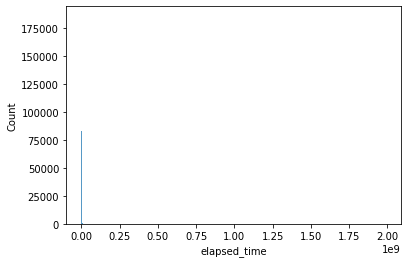

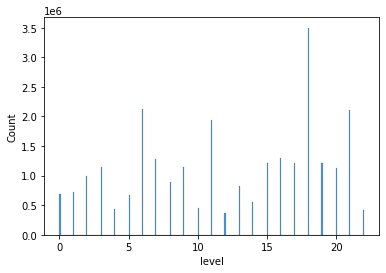

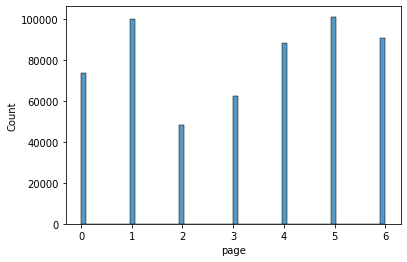

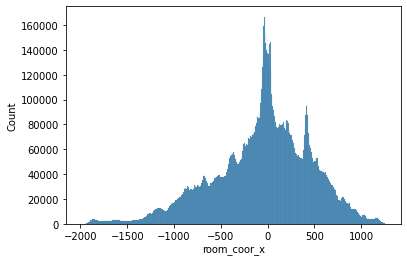

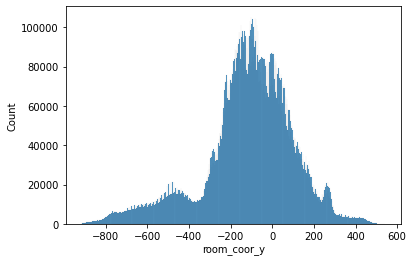

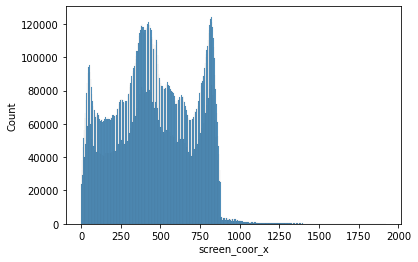

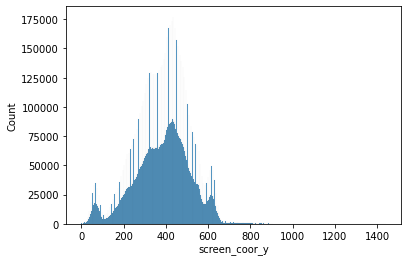

In [26]:
for num_feature in NUMERICAL:
    sns.histplot(train_df[num_feature])
    plt.show()

### Elapsed time

In [11]:
train_df[train_df["elapsed_time"]<0.1]["event_name"].unique()

['cutscene_click', 'person_click', 'navigate_click', 'object_click']
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']

In [91]:
Q1_et = train_df['elapsed_time'].quantile(0.25)
Q3_et = train_df['elapsed_time'].quantile(0.75)
IQR_et = Q3_et - Q1_et
lower_limit_et = Q1_et - 1.5 * IQR_et
upper_limit_et = Q3_et + 1.5 * IQR_et

In [17]:
train_df[train_df["elapsed_time"]>upper_limit_et]["event_name"]

2659          person_click
2660        navigate_click
2661        navigate_click
2662        navigate_click
2663          object_hover
                 ...      
26296941    navigate_click
26296942    navigate_click
26296943    navigate_click
26296944    navigate_click
26296945        checkpoint
Name: event_name, Length: 1905440, dtype: category
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']

In [92]:
train_df[train_df["elapsed_time"]>upper_limit_et]["event_name"].unique()

['person_click', 'navigate_click', 'object_hover', 'object_click', 'notification_click', ..., 'map_hover', 'map_click', 'checkpoint', 'cutscene_click', 'observation_click']
Length: 11
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']

In [18]:
train_df[train_df["elapsed_time"]>lower_limit_et]["event_name"]

0           cutscene_click
1             person_click
2             person_click
3             person_click
4             person_click
                 ...      
26296941    navigate_click
26296942    navigate_click
26296943    navigate_click
26296944    navigate_click
26296945        checkpoint
Name: event_name, Length: 26296946, dtype: category
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']

In [19]:
train_df['elapsed_time_log'] = np.log(train_df['elapsed_time'] + 1)

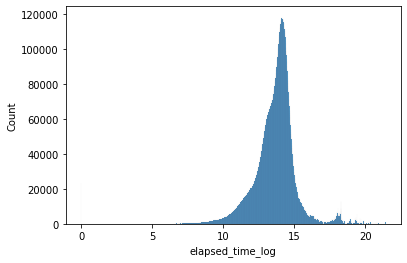

In [21]:
sns.histplot(train_df['elapsed_time_log'])
plt.show()

### Hover Duration

In [22]:
Q1_hd = train_df['hover_duration'].quantile(0.25)
Q3_hd = train_df['hover_duration'].quantile(0.75)
IQR_hd = Q3_hd - Q1_hd
lower_limit_hd = Q1_hd - 1.5 * IQR_hd
upper_limit_hd = Q3_hd + 1.5 * IQR_hd

In [29]:
train_df[train_df["hover_duration"]>upper_limit_hd]["event_name"]

49          object_hover
87          object_hover
148         object_hover
341         object_hover
371         object_hover
                ...     
26296077    object_hover
26296171    object_hover
26296616    object_hover
26296765    object_hover
26296917    object_hover
Name: event_name, Length: 282683, dtype: category
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']

In [30]:
train_df[train_df["hover_duration"]>lower_limit_hd]["event_name"]

49          object_hover
82          object_hover
87          object_hover
127            map_hover
128            map_hover
                ...     
26296926    object_hover
26296928    object_hover
26296929    object_hover
26296938       map_hover
26296939       map_hover
Name: event_name, Length: 2002244, dtype: category
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']

In [31]:
train_df['hover_duration_log'] = np.log(train_df['hover_duration'] + 1)

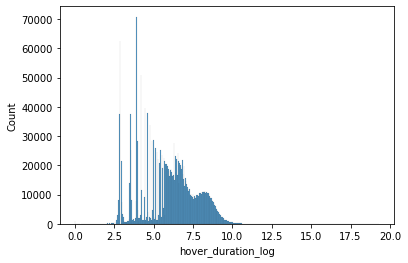

In [32]:
sns.histplot(train_df['hover_duration_log'])
plt.show()

## Análisis categórico

CATEGORICAL = ['event_name', 'name','fqid', 'room_fqid', 'text_fqid']

### Name

The event name (e.g. identifies whether a notebook_click is is opening or closing the notebook)

In [37]:
train_df["name"].unique()

['basic', 'undefined', 'close', 'open', 'prev', 'next']
Categories (6, object): ['basic', 'close', 'next', 'open', 'prev', 'undefined']

- 'basic': This could potentially represent a basic or default action, perhaps the player is simply navigating or interacting with the game in a non-specific way. It could also mean an action that does not fall under the other categories.

- 'undefined': This might represent missing or unrecorded information. It could also be an event type that doesn't fit any of the other categories.

- 'close': This likely indicates the action of closing something within the game, such as a notebook, a menu, or a pop-up dialog.

- 'open': Opposite to 'close', this likely indicates the action of opening something within the game, such as a notebook, a menu, or a pop-up dialog.

- 'prev': This could indicate the action of going back to the previous page, level, or screen within the game.

- 'next': Opposite to 'prev', this could represent moving forward to the next page, level, or screen within the game.

In [63]:
train_df["name"].value_counts()

name
undefined    12705785
basic        12648469
close          676696
open           235139
prev            19250
next            11607
Name: count, dtype: int64

In [57]:
list(train_df[train_df["name"]=="basic"]["event_name"].unique())

['cutscene_click',
 'person_click',
 'observation_click',
 'notification_click',
 'object_hover',
 'object_click',
 'map_hover',
 'checkpoint',
 'map_click',
 'notebook_click']

In [41]:
train_df[train_df["name"]=="undefined"]["event_name"].unique()

['navigate_click', 'object_hover', 'map_click']
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']

La categoria undefined va asociada a los clicks para navegar el personaje, la posición del ratón encima de los objetos y los clicks de los mapas.

In [50]:
train_df[(train_df["name"]=="undefined") & (train_df["event_name"]=="map_click")].head(5)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log,hover_duration_log
129,20090312431273200,129,135990,map_click,undefined,3,NaN,168.002640,-142.290131,263.0,...,NaN,tunic.kohlcenter,tunic.historicalsociety.entry,NaN,0,0,1,0-4,11.820344,NaN
162,20090312431273200,162,162438,map_click,undefined,4,NaN,-538.093384,6.000000,462.0,...,NaN,tunic.capitol_0,tunic.kohlcenter.halloffame,NaN,0,0,1,0-4,11.998058,NaN
173,20090312431273200,183,228133,map_click,undefined,5,NaN,456.774048,167.182114,559.0,...,NaN,tunic.historicalsociety,tunic.capitol_0.hall,NaN,0,0,1,5-12,12.337688,NaN
275,20090312431273200,285,324396,map_click,undefined,7,NaN,418.480377,-200.954971,420.0,...,NaN,tunic.humanecology,tunic.historicalsociety.entry,NaN,0,0,1,5-12,12.689723,NaN
319,20090312431273200,329,357345,map_click,undefined,8,NaN,432.459686,60.000000,587.0,...,NaN,tunic.drycleaner,tunic.humanecology.frontdesk,NaN,0,0,1,5-12,12.786460,NaN


In [48]:
list(train_df[(train_df["name"]=="undefined") & (train_df["event_name"]=="map_click")]["fqid"].unique())

['tunic.kohlcenter',
 'tunic.capitol_0',
 'tunic.historicalsociety',
 'tunic.humanecology',
 'tunic.drycleaner',
 'tunic.library',
 'tunic.capitol_1',
 'tunic.wildlife',
 'tunic.flaghouse',
 'tunic.capitol_2']

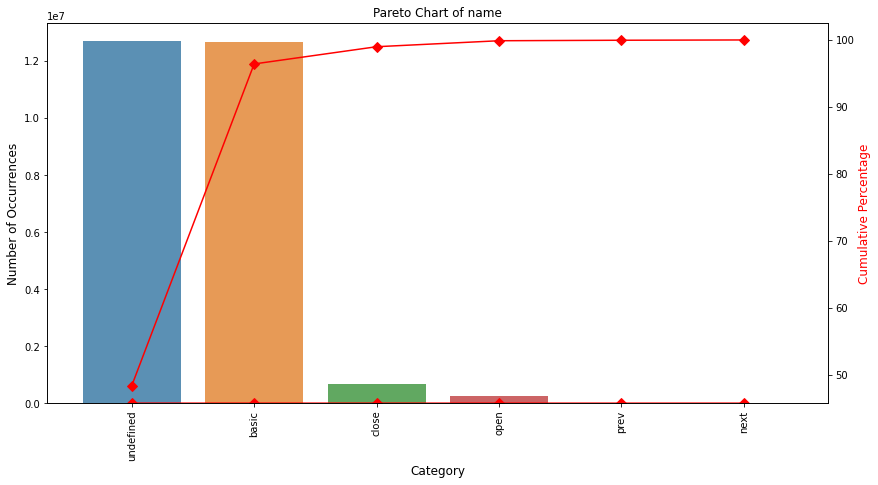

In [79]:
name_counts = train_df["name"].value_counts().sort_values(ascending=False)
cumulative_percentage_name = name_counts.cumsum() / name_counts.sum() * 100

plt.figure(figsize=(14,7))
sns.barplot(x=name_counts.index, y=name_counts.values, alpha=0.8, order=name_counts.index)
plt.plot(name_counts.index, cumulative_percentage_name, color='red', marker='D', ms=7)

plt.title('Pareto Chart of name')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)

ax3 = plt.twinx()
ax3.plot(name_counts.index, cumulative_percentage_name, color='red', marker='D', ms=7)
ax3.set_ylabel('Cumulative Percentage', fontsize=12, color='red')

plt.show()

In [94]:
observed_frequencies_name = train_df['name'].value_counts().sort_index().values

# Under the null hypothesis, we expect each category to be equally likely
expected_frequencies_name = [len(train_df) / len(train_df['name'].unique())] * len(train_df['name'].unique())

# Perform the chi-square test
chi2_name, p_name = chisquare(observed_frequencies_name, f_exp=expected_frequencies_name)

print(f"Chi-square statistic = {chi2_name}, p-value = {p_name}")

Chi-square statistic = 47156706.060023695, p-value = 0.0


### Fqid

In [53]:
train_df["fqid"].unique()

['intro', 'gramps', 'teddy', 'photo', NaN, ..., 'block_badge', 'fox', 'block_badge_2', 'block_1', 'chap2_finale']
Length: 129
Categories (128, object): ['archivist', 'archivist_glasses', 'block', 'block_0', ..., 'fox', 'block_badge_2', 'block_1', 'chap2_finale']

In [70]:
fqid_counts = train_df["fqid"].value_counts().sort_values(ascending=False)

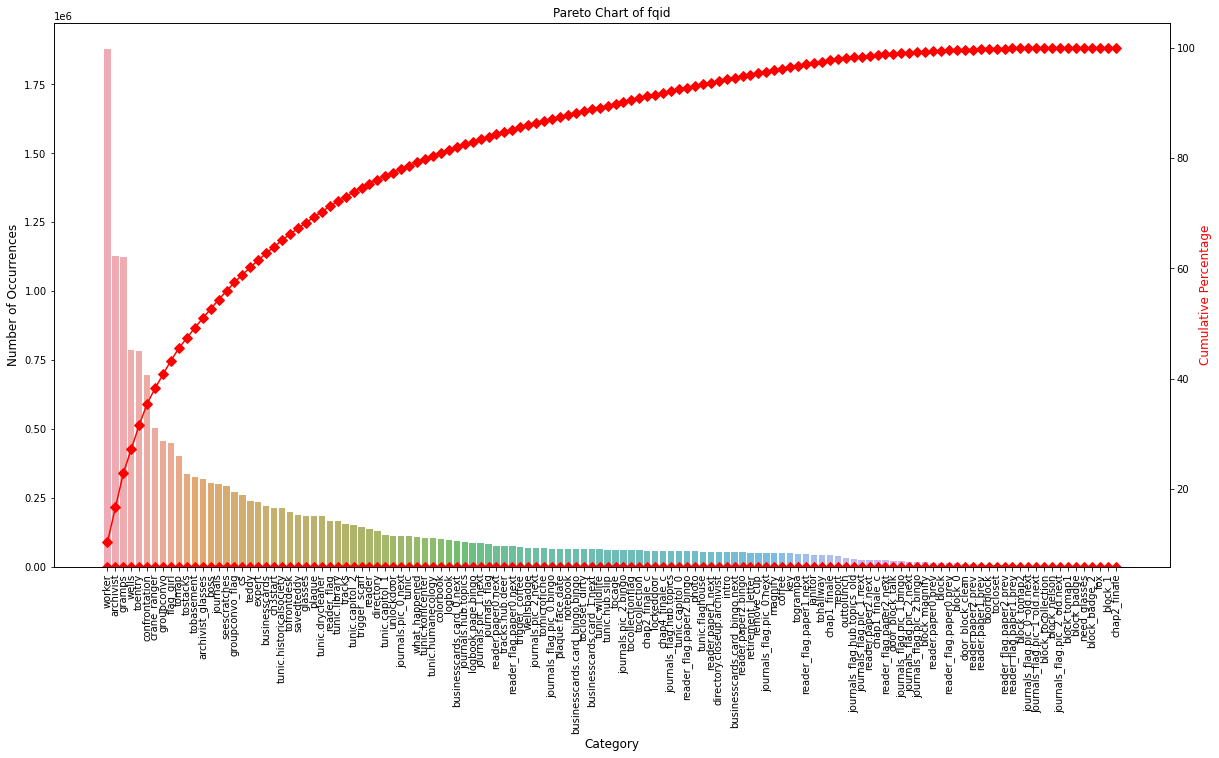

In [72]:
cumulative_percentage_fqid = fqid_counts.cumsum() / fqid_counts.sum() * 100

plt.figure(figsize=(20,10))
sns.barplot(x=fqid_counts.index, y=fqid_counts.values, alpha=0.8, order=fqid_counts.index)
plt.plot(fqid_counts.index, cumulative_percentage_fqid, color='red', marker='D', ms=7)

plt.title('Pareto Chart of fqid')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)

ax2 = plt.twinx()
ax2.plot(fqid_counts.index, cumulative_percentage_fqid, color='red', marker='D', ms=7)
ax2.set_ylabel('Cumulative Percentage', fontsize=12, color='red')

plt.show()

In [68]:
fqid_counts

fqid
worker           1878958
archivist        1127341
gramps           1122264
wells             787418
toentry           784496
                  ...   
need_glasses        1297
block_badge_2        993
fox                  465
block_1               37
chap2_finale           1
Name: count, Length: 128, dtype: int64

In [76]:
mask_fqid = cumulative_percentage_fqid <= 80
pareto_80_fqid = fqid_counts[mask_fqid]
print(pareto_80_fqid)
print("\nNumber of fqid making up 80%: ", len(pareto_80_fqid))

fqid
worker                     1878958
archivist                  1127341
gramps                     1122264
wells                       787418
toentry                     784496
confrontation               697098
crane_ranger                503927
groupconvo                  455705
flag_girl                   449742
tomap                       403048
tostacks                    337276
tobasement                  324815
archivist_glasses           316855
boss                        303627
journals                    298369
seescratches                292348
groupconvo_flag             271927
cs                          259499
teddy                       238471
expert                      236033
businesscards               221564
ch3start                    214118
tunic.historicalsociety     213820
tofrontdesk                 198679
savedteddy                  185823
glasses                     183157
plaque                      183011
tunic.drycleaner            182497
reader_flag    

In [51]:
list(train_df[(train_df["name"]=="undefined") & (train_df["event_name"]=="map_click")]["room_fqid"].unique())

['tunic.historicalsociety.entry',
 'tunic.kohlcenter.halloffame',
 'tunic.capitol_0.hall',
 'tunic.humanecology.frontdesk',
 'tunic.drycleaner.frontdesk',
 'tunic.library.frontdesk',
 'tunic.capitol_1.hall',
 'tunic.wildlife.center',
 'tunic.flaghouse.entry',
 'tunic.capitol_2.hall']

### Room fqid

In [56]:
train_df["room_fqid"].unique()

['tunic.historicalsociety.closet', 'tunic.historicalsociety.basement', 'tunic.historicalsociety.entry', 'tunic.historicalsociety.collection', 'tunic.historicalsociety.stacks', ..., 'tunic.historicalsociety.cage', 'tunic.historicalsociety.collection_flag', 'tunic.wildlife.center', 'tunic.flaghouse.entry', 'tunic.capitol_2.hall']
Length: 19
Categories (19, object): ['tunic.capitol_0.hall', 'tunic.capitol_1.hall', 'tunic.capitol_2.hall', 'tunic.drycleaner.frontdesk', ..., 'tunic.kohlcenter.halloffame', 'tunic.library.frontdesk', 'tunic.library.microfiche', 'tunic.wildlife.center']

In [52]:
list(train_df[(train_df["name"]=="undefined") & (train_df["event_name"]=="map_click")]["text_fqid"].unique())

[nan]

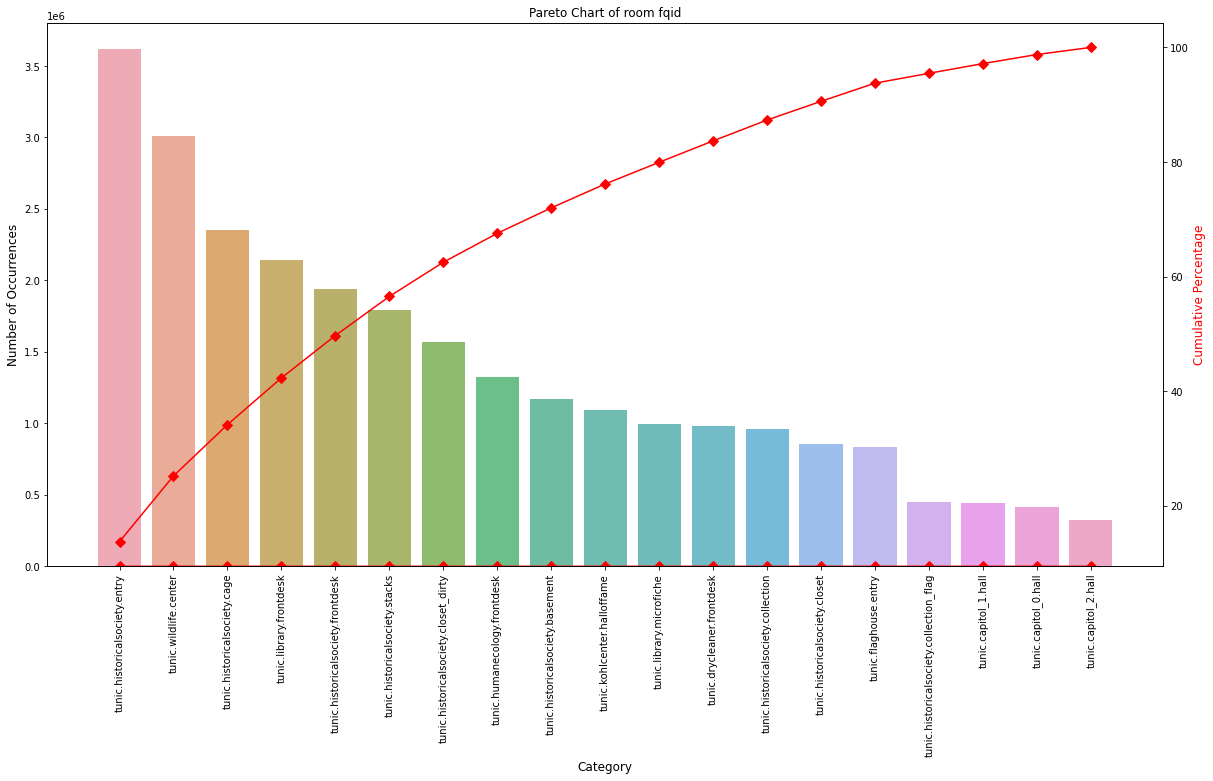

In [81]:
room_fqid_counts = train_df["room_fqid"].value_counts().sort_values(ascending=False)
cumulative_percentage_room_fqid = room_fqid_counts.cumsum() / room_fqid_counts.sum() * 100

plt.figure(figsize=(20,10))
sns.barplot(x=room_fqid_counts.index, y=room_fqid_counts.values, alpha=0.8, order=room_fqid_counts.index)
plt.plot(room_fqid_counts.index, cumulative_percentage_room_fqid, color='red', marker='D', ms=7)

plt.title('Pareto Chart of room fqid')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)

ax4 = plt.twinx()
ax4.plot(room_fqid_counts.index, cumulative_percentage_room_fqid, color='red', marker='D', ms=7)
ax4.set_ylabel('Cumulative Percentage', fontsize=12, color='red')

plt.show()

In [82]:
mask_room_fqid = cumulative_percentage_room_fqid <= 80
pareto_80_room_fqid = room_fqid_counts[mask_room_fqid]
print(pareto_80_room_fqid)
print("\nNumber of room fqid making up 80%: ", len(pareto_80_room_fqid))

room_fqid
tunic.historicalsociety.entry           3622003
tunic.wildlife.center                   3013154
tunic.historicalsociety.cage            2352083
tunic.library.frontdesk                 2145666
tunic.historicalsociety.frontdesk       1943066
tunic.historicalsociety.stacks          1794007
tunic.historicalsociety.closet_dirty    1568994
tunic.humanecology.frontdesk            1326890
tunic.historicalsociety.basement        1168090
tunic.kohlcenter.halloffame             1096872
tunic.library.microfiche                 995674
Name: count, dtype: int64

Number of room fqid making up 80%:  11


### Event name

In [59]:
list(train_df["event_name"].unique())

['cutscene_click',
 'person_click',
 'navigate_click',
 'observation_click',
 'notification_click',
 'object_click',
 'object_hover',
 'map_hover',
 'map_click',
 'checkpoint',
 'notebook_click']

In [43]:
train_df[train_df["event_name"]=="navigate_click"].head(5)

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group,elapsed_time_log,hover_duration_log
10,20090312431273200,10,9133,navigate_click,undefined,0,NaN,501.110046,-160.748169,605.0,...,NaN,teddy,tunic.historicalsociety.closet,NaN,0,0,1,0-4,9.119759,NaN
12,20090312431273200,12,12030,navigate_click,undefined,0,NaN,510.081482,-106.352097,614.0,...,NaN,photo,tunic.historicalsociety.closet,NaN,0,0,1,0-4,9.395242,NaN
14,20090312431273200,14,14814,navigate_click,undefined,0,NaN,273.991425,-196.802368,406.0,...,NaN,NaN,tunic.historicalsociety.closet,NaN,0,0,1,0-4,9.603395,NaN
15,20090312431273200,15,15498,navigate_click,undefined,0,NaN,185.708466,-205.806534,363.0,...,NaN,NaN,tunic.historicalsociety.closet,NaN,0,0,1,0-4,9.648531,NaN
16,20090312431273200,16,16046,navigate_click,undefined,0,NaN,0.583565,-225.691299,234.0,...,NaN,NaN,tunic.historicalsociety.closet,NaN,0,0,1,0-4,9.683277,NaN


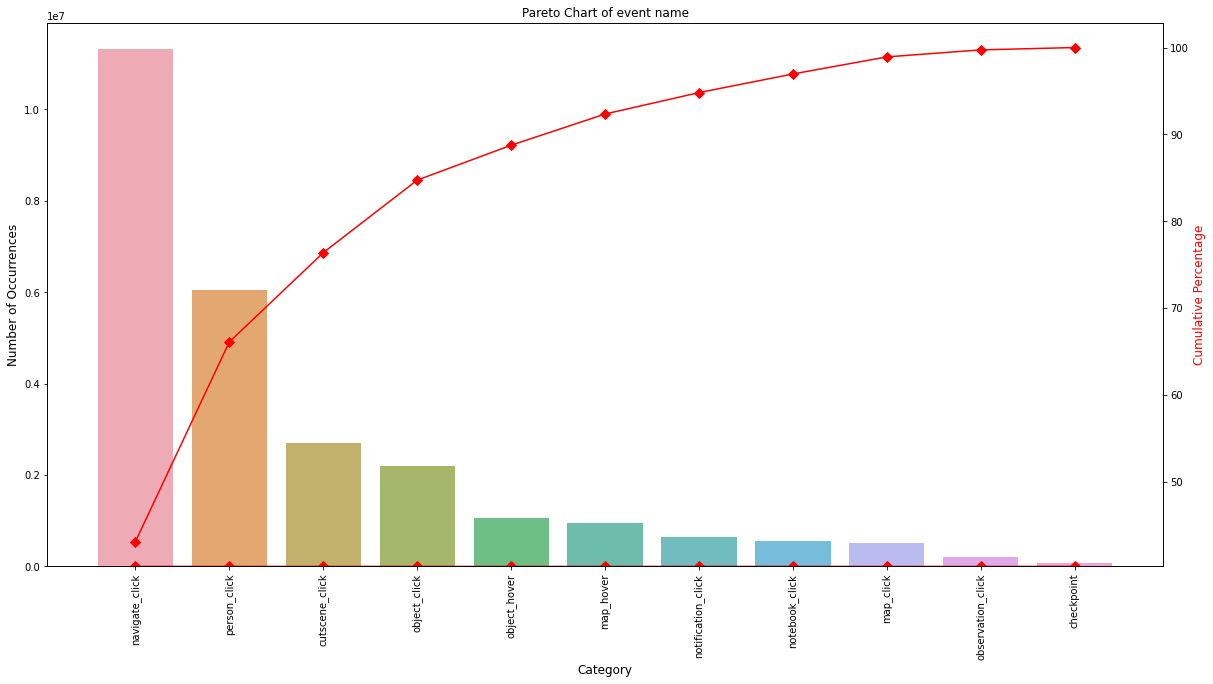

In [83]:
event_name_counts = train_df["event_name"].value_counts().sort_values(ascending=False)
cumulative_percentage_event_name = event_name_counts.cumsum() / event_name_counts.sum() * 100

plt.figure(figsize=(20,10))
sns.barplot(x=event_name_counts.index, y=event_name_counts.values, alpha=0.8, order=event_name_counts.index)
plt.plot(event_name_counts.index, cumulative_percentage_event_name, color='red', marker='D', ms=7)

plt.title('Pareto Chart of event name')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)

ax5 = plt.twinx()
ax5.plot(event_name_counts.index, cumulative_percentage_event_name, color='red', marker='D', ms=7)
ax5.set_ylabel('Cumulative Percentage', fontsize=12, color='red')

plt.show()

In [84]:
mask_event_name = cumulative_percentage_event_name <= 80
pareto_80_event_name = event_name_counts[mask_event_name]
print(pareto_80_event_name)
print("\nNumber of event name making up 80%: ", len(pareto_80_event_name))

event_name
navigate_click    11326433
person_click       6052853
cutscene_click     2703035
Name: count, dtype: int64

Number of event name making up 80%:  3


### Text fqid

In [61]:
train_df["text_fqid"].unique()

['tunic.historicalsociety.closet.intro', 'tunic.historicalsociety.closet.gramps.intro_0..., 'tunic.historicalsociety.closet.teddy.intro_0_..., NaN, 'tunic.historicalsociety.closet.teddy.intro_0_..., ..., 'tunic.wildlife.center.fox.concern', 'tunic.library.frontdesk.block_badge_2', 'tunic.historicalsociety.entry.gramps.hub', 'tunic.humanecology.frontdesk.block_1', 'tunic.drycleaner.frontdesk.block_1']
Length: 127
Categories (126, object): ['tunic.capitol_0.hall.boss.talktogramps', 'tunic.capitol_0.hall.chap1_finale_c', 'tunic.capitol_1.hall.boss.haveyougotit', 'tunic.capitol_1.hall.boss.writeitup', ..., 'tunic.library.frontdesk.block_badge_2', 'tunic.historicalsociety.entry.gramps.hub', 'tunic.humanecology.frontdesk.block_1', 'tunic.drycleaner.frontdesk.block_1']

In [62]:
train_df["text_fqid"].value_counts()

text_fqid
tunic.historicalsociety.cage.confrontation               666557
tunic.wildlife.center.crane_ranger.crane                 470755
tunic.historicalsociety.frontdesk.archivist.newspaper    429762
tunic.historicalsociety.entry.groupconvo                 427180
tunic.wildlife.center.wells.nodeer                       399967
                                                          ...  
tunic.capitol_2.hall.chap4_finale_c                         280
tunic.drycleaner.frontdesk.block_0                          221
tunic.historicalsociety.entry.gramps.hub                     39
tunic.humanecology.frontdesk.block_1                         13
tunic.drycleaner.frontdesk.block_1                            3
Name: count, Length: 126, dtype: int64

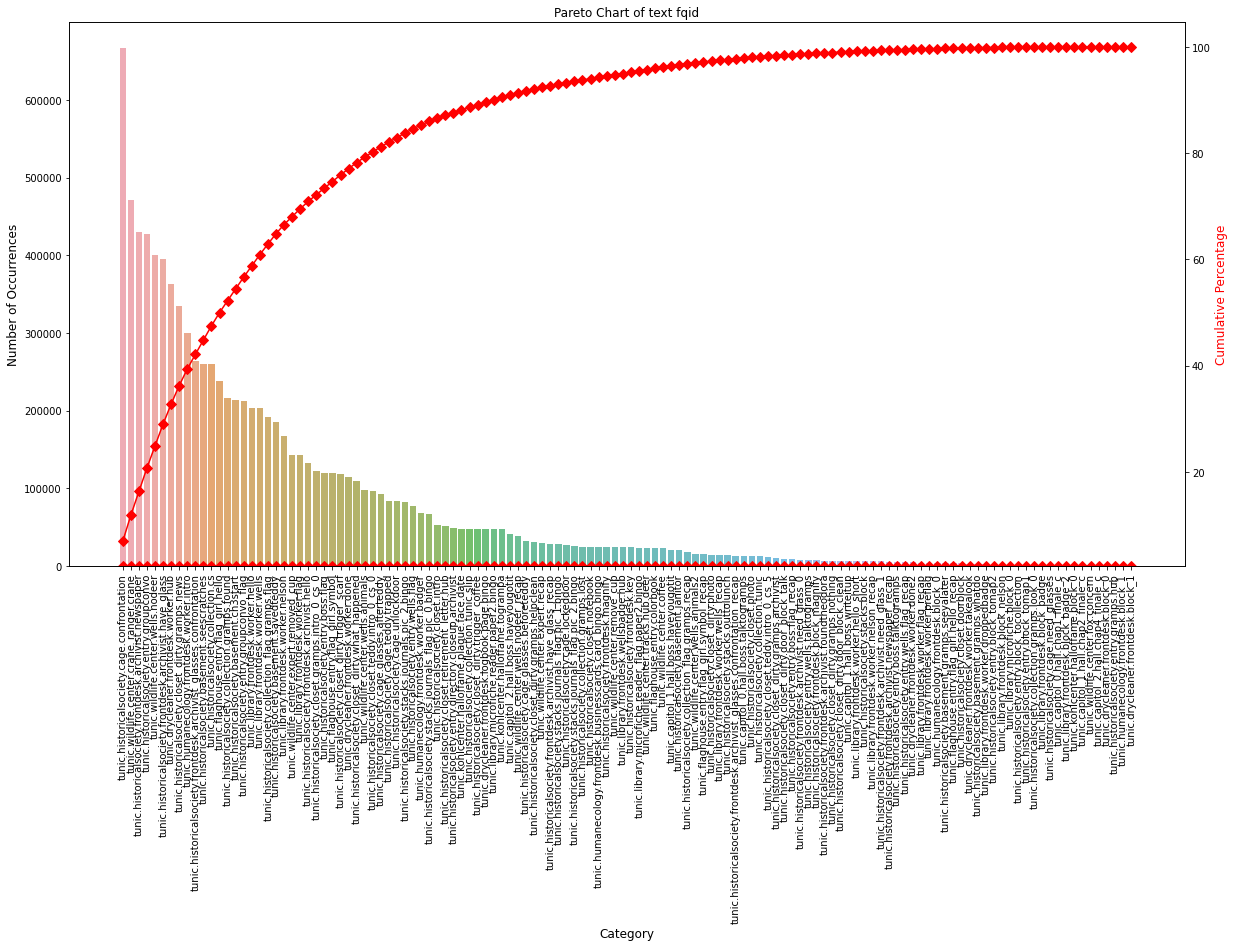

In [85]:
text_fqid_counts = train_df["text_fqid"].value_counts().sort_values(ascending=False)
cumulative_percentage_text_fqid = text_fqid_counts.cumsum() / text_fqid_counts.sum() * 100

plt.figure(figsize=(20,10))
sns.barplot(x=text_fqid_counts.index, y=text_fqid_counts.values, alpha=0.8, order=text_fqid_counts.index)
plt.plot(text_fqid_counts.index, cumulative_percentage_text_fqid, color='red', marker='D', ms=7)

plt.title('Pareto Chart of text fqid')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category', fontsize=12)
plt.xticks(rotation=90)

ax6 = plt.twinx()
ax6.plot(text_fqid_counts.index, cumulative_percentage_text_fqid, color='red', marker='D', ms=7)
ax6.set_ylabel('Cumulative Percentage', fontsize=12, color='red')

plt.show()

In [88]:
mask_text_fqid = cumulative_percentage_text_fqid <= 80
pareto_80_text_fqid = text_fqid_counts[mask_text_fqid]
print(pareto_80_text_fqid)
print("\nNumber of text fqid making up 80%: ", len(pareto_80_text_fqid))

text_fqid
tunic.historicalsociety.cage.confrontation                           666557
tunic.wildlife.center.crane_ranger.crane                             470755
tunic.historicalsociety.frontdesk.archivist.newspaper                429762
tunic.historicalsociety.entry.groupconvo                             427180
tunic.wildlife.center.wells.nodeer                                   399967
tunic.historicalsociety.frontdesk.archivist.have_glass               394908
tunic.drycleaner.frontdesk.worker.hub                                362883
tunic.historicalsociety.closet_dirty.gramps.news                     334439
tunic.humanecology.frontdesk.worker.intro                            300110
tunic.historicalsociety.frontdesk.archivist_glasses.confrontation    263308
tunic.historicalsociety.basement.seescratches                        260236
tunic.historicalsociety.collection.cs                                259499
tunic.flaghouse.entry.flag_girl.hello                                238202
tu

# Label Data

In [12]:
target_path = os.path.join(full_path, "data", "train_labels.csv")
labels = pd.read_csv(target_path)

In [13]:
labels['session'] = labels.session_id.apply(lambda x: int(x.split('_')[0]) )
labels['q'] = labels.session_id.apply(lambda x: int(x.split('_')[-1][1:]) )

In [14]:
labels.head(5)

,session_id,correct,session,q
0,20090312431273200_q1,1,20090312431273200,1
1,20090312433251036_q1,0,20090312433251036,1
2,20090312455206810_q1,1,20090312455206810,1
3,20090313091715820_q1,0,20090313091715820,1
4,20090313571836404_q1,1,20090313571836404,1


In [7]:
labels["q"].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18], dtype=int64)

In [15]:
labels['question'] = 'q' + labels['q'].astype(str)  # Create a column for each question number
labels_matrix = labels.pivot(index='session_id', columns='question', values='correct')  # Pivot the dataframe

In [16]:
labels.head(5)

,session_id,correct,session,q,question
0,20090312431273200_q1,1,20090312431273200,1,q1
1,20090312433251036_q1,0,20090312433251036,1,q1
2,20090312455206810_q1,1,20090312455206810,1,q1
3,20090313091715820_q1,0,20090313091715820,1,q1
4,20090313571836404_q1,1,20090313571836404,1,q1


In [22]:
labels[labels["session"]==20090312431273200]

,session_id,correct,session,q,question
0,20090312431273200_q1,1,20090312431273200,1,q1
23562,20090312431273200_q2,1,20090312431273200,2,q2
47124,20090312431273200_q3,1,20090312431273200,3,q3
70686,20090312431273200_q4,1,20090312431273200,4,q4
94248,20090312431273200_q5,1,20090312431273200,5,q5
117810,20090312431273200_q6,1,20090312431273200,6,q6
141372,20090312431273200_q7,1,20090312431273200,7,q7
164934,20090312431273200_q8,1,20090312431273200,8,q8
188496,20090312431273200_q9,1,20090312431273200,9,q9
212058,20090312431273200_q10,1,20090312431273200,10,q10


In [17]:
labels_matrix.head(5)

question,q1,q10,q11,q12,q13,q14,q15,q16,q17,q18,q2,q3,q4,q5,q6,q7,q8,q9
session_id,,,,,,,,,,,,,,,,,,
20090312431273200_q1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090312431273200_q10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090312431273200_q11,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090312431273200_q12,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090312431273200_q13,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
labels_matrix = labels_matrix.reindex(sorted(labels_matrix.columns, key=lambda x: int(x[1:])), axis=1)


In [19]:
labels_matrix.head(5)

question,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18
session_id,,,,,,,,,,,,,,,,,,
20090312431273200_q1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090312431273200_q10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090312431273200_q11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20090312431273200_q12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
20090312431273200_q13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN


In [30]:
# Extract question number from session_id, convert it to integer
labels_matrix['q_num'] = labels_matrix.index.map(lambda x: int(x.split('_')[-1][1:]))

In [31]:
labels_matrix.head(5)

question,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18,q_num
session_id,,,,,,,,,,,,,,,,,,,
20090312431273200_q1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
20090312431273200_q10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
20090312431273200_q11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11
20090312431273200_q12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,12
20090312431273200_q13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,13


In [32]:
# Sort rows by question number
labels_matrix.sort_values('q_num', inplace=True)

# Drop the temporary column used for sorting
labels_matrix.drop(columns=['q_num'], inplace=True)

In [33]:
labels_matrix.head(5)

question,q1,q2,q3,q4,q5,q6,q7,q8,q9,q10,q11,q12,q13,q14,q15,q16,q17,q18
session_id,,,,,,,,,,,,,,,,,,
20090312431273200_q1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22000115144817252_q1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21000413571125716_q1,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22000115125044796_q1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
21000413574445050_q1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
labels_matrix[['session_id', 'q_num']] = labels_matrix.index.str.split('_', expand=True)
labels_matrix['q_num'] = labels_matrix['q_num'].str[1:].astype(int)

ValueError: Columns must be same length as key

In [ ]:
labels_matrix.head(5)

# Analisis Bivariado

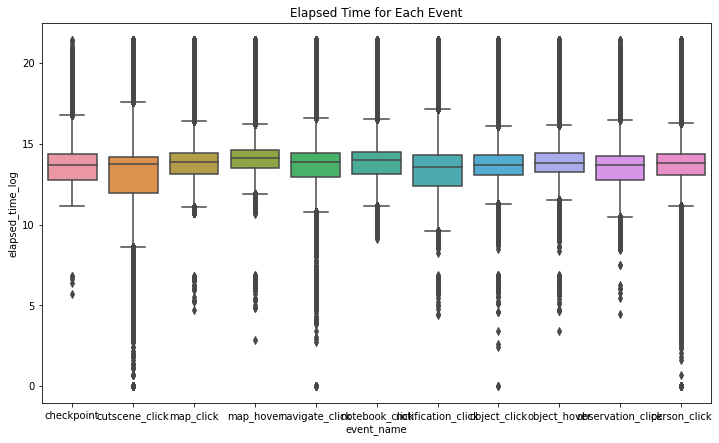

In [99]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='event_name', y='elapsed_time_log', data=train_df)
plt.title('Elapsed Time for Each Event')
plt.show()

## Numerical - Numerical Analysis

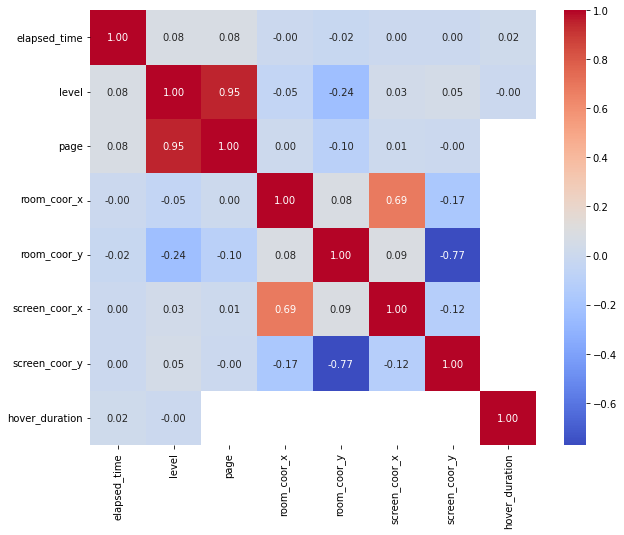

In [100]:
correlations = train_df[NUMERICAL].corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlations, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.show()

- Level and page have a strong correlation: 0.95
- Room coor x and screen coor x : 0.69
- Room coor y and screen coor y : -0.77

## Categorical - Categorical Analysis

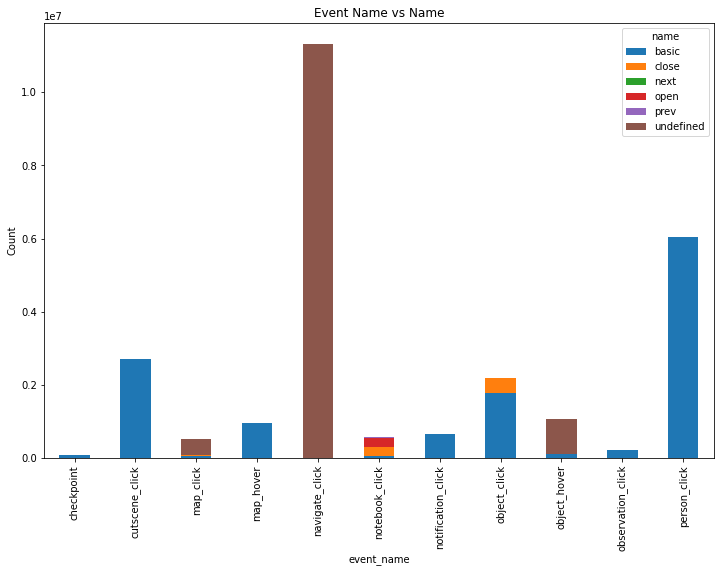

In [101]:
# Count the number of each combination of categories
cat_counts = train_df.groupby(['event_name', 'name']).size().reset_index(name='counts')

# Pivot this data so we can create a stacked bar chart
cat_counts_pivot = cat_counts.pivot(index='event_name', columns='name', values='counts').fillna(0)

# Plot stacked bar chart
cat_counts_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))
plt.title('Event Name vs Name')
plt.ylabel('Count')
plt.show()

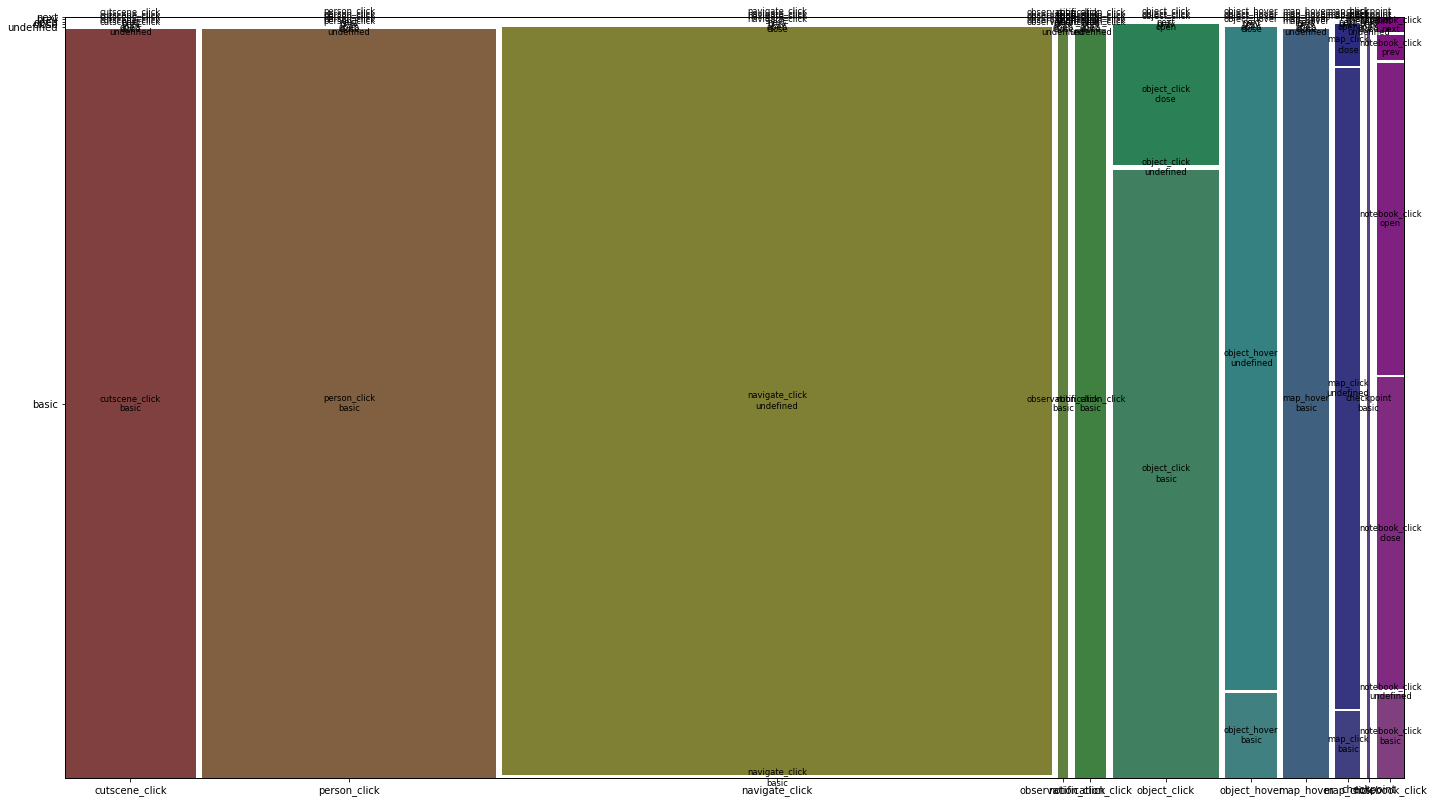

In [105]:
fig, ax10 = plt.subplots(figsize=(24, 14))
mosaic(train_df, ['event_name', 'name'],ax=ax10)
plt.show()

## Categorical - Numerical Analysis

# Missing values

In [33]:
train_df.isna().sum()

session_id                   0
index                        0
elapsed_time                 0
event_name                   0
name                         0
level                        0
page                  25732402
room_coor_x            2073272
room_coor_y            2073272
screen_coor_x          2073272
screen_coor_y          2073272
hover_duration        24294702
text                  16679807
fqid                   8274415
room_fqid                    0
text_fqid             16679702
fullscreen                   0
hq                           0
music                        0
level_group                  0
elapsed_time_log             0
hover_duration_log    24294702
dtype: int64

In [17]:
train_df[train_df["page"].notnull()]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
941,20090312433251036,60,60743,notebook_click,open,2,0.0,-1112.320557,-518.582275,30.0,639.0,NaN,NaN,NaN,tunic.historicalsociety.entry,NaN,0,0,0,0-4
942,20090312433251036,61,61761,notebook_click,close,2,0.0,73.221992,428.191803,789.0,58.0,NaN,NaN,NaN,tunic.historicalsociety.entry,NaN,0,0,0,0-4
1079,20090312433251036,209,351064,notebook_click,open,6,1.0,-490.732666,-429.718872,61.0,629.0,NaN,NaN,NaN,tunic.historicalsociety.basement,NaN,0,0,0,5-12
1080,20090312433251036,210,354779,notebook_click,basic,6,1.0,-97.641754,-304.264343,343.0,539.0,NaN,NaN,NaN,tunic.historicalsociety.basement,NaN,0,0,0,5-12
1081,20090312433251036,211,357947,notebook_click,close,6,1.0,556.115845,342.523560,812.0,75.0,NaN,NaN,NaN,tunic.historicalsociety.basement,NaN,0,0,0,5-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26296901,22100221145014656,1560,5404315,notebook_click,close,21,6.0,266.576569,260.000000,811.0,70.0,NaN,NaN,NaN,tunic.historicalsociety.frontdesk,NaN,0,0,1,13-22
26296932,22100221145014656,1591,5472007,notebook_click,open,22,6.0,-339.856537,-309.145874,73.0,628.0,NaN,NaN,NaN,tunic.historicalsociety.stacks,NaN,0,0,1,13-22
26296933,22100221145014656,1592,5473806,notebook_click,basic,22,6.0,35.565876,-202.179367,469.0,515.0,NaN,NaN,NaN,tunic.historicalsociety.stacks,NaN,0,0,1,13-22
26296934,22100221145014656,1593,5474807,notebook_click,basic,22,6.0,330.938324,275.636627,765.0,37.0,NaN,NaN,NaN,tunic.historicalsociety.stacks,NaN,0,0,1,13-22


In [23]:
train_df[train_df["page"].notnull()]["event_name"].unique()

['notebook_click']
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']

- Podemos observare que la pagina solo aparece cuando sucede el evento "notebook_click"

In [35]:
train_df[train_df["hover_duration"].isnull()]["event_name"].unique()

['cutscene_click', 'person_click', 'navigate_click', 'observation_click', 'notification_click', 'object_click', 'map_click', 'checkpoint', 'notebook_click']
Categories (11, object): ['checkpoint', 'cutscene_click', 'map_click', 'map_hover', ..., 'object_click', 'object_hover', 'observation_click', 'person_click']

In [36]:
train_df[train_df["hover_duration"].isnull()]["name"].unique()

['basic', 'undefined', 'close', 'open', 'prev', 'next']
Categories (6, object): ['basic', 'close', 'next', 'open', 'prev', 'undefined']